In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2 
import os

In [3]:
path = 'C:/Users/Chinmaya/Desktop/NOTES/Mozofest Hackathon/eye/images'
os.chdir(path)

In [6]:
folders = ['cat','normal']
labels = []
images = []

In [7]:
img_size = 128

In [8]:
for folder in folders:
    print(folder)
    for path in os.listdir(os.getcwd()+'/'+folder):
        img = cv2.imread(folder+'/'+path,3)
    #    cv2.imshow('img',img)
     #   cv2.waitKey(1)
        images.append(cv2.resize(img, (img_size, img_size)))
        labels.append(folders.index(folder))

cat
normal


In [14]:
images[0].shape

(128, 128, 3)

In [19]:
images[0].flatten()

array([115, 147, 182, ...,  97, 126, 183], dtype=uint8)

In [30]:
for i in range(0,len(images)):
    images[i] = images[i].flatten()

In [33]:
images[0].shape #128*128*3

(49152,)

In [60]:
len(labels)

1945

In [62]:
type(images)

list

In [64]:
images = np.array(images)

In [67]:
type(images)

numpy.ndarray

In [68]:
labels = np.array(labels)

In [69]:
type(labels)

numpy.ndarray

In [70]:
train_data = [images, labels]

In [54]:
# Keras Training Parameters
batch_size = 32
nb_classes = 2
nb_epoch = 30
img_rows, img_col = 128, 128
img_channels = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [57]:
from sklearn.model_selection import train_test_split

In [73]:
(X, y) = (train_data[0], train_data[1])

# Splitting X and y in training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [79]:
# Validating the individual sizes
print("X_train : {0}".format(X_train.shape))
print("y_train :{0}".format(y_train.shape))

print("X_test : {0}".format(X_test.shape))
print("y_test : {0}".format(y_test.shape))

X_train : (1556, 3, 128, 128)
y_train :(1556,)
X_test : (389, 3, 128, 128)
y_test : (389,)


In [85]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [87]:
# Reshaping the data to pass to CNN
X_train = X_train.reshape(X_train.shape[0], 3, 128, 128)
X_test = X_test.reshape(X_test.shape[0], 3, 128, 128)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [88]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [89]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [93]:
from keras.layers import Dropout

In [94]:
from keras.layers.convolutional import Convolution2D

In [95]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding="valid",
                 activation='relu',
                 input_shape=(img_channels, img_rows, img_col),
                 data_format='channels_first'))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.50))

model.add(Convolution2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [96]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,
                     verbose=1, validation_data=(X_test, y_test))

Train on 1556 samples, validate on 389 samples
Epoch 1/30
1556/1556 [==============================] - 79s 51ms/step - loss: 0.7038 - acc: 0.5103 - val_loss: 0.6873 - val_acc: 0.6221
Epoch 2/30
1556/1556 [==============================] - 80s 51ms/step - loss: 0.6193 - acc: 0.6337 - val_loss: 0.4879 - val_acc: 0.7532
Epoch 3/30
1556/1556 [==============================] - 86s 55ms/step - loss: 0.4056 - acc: 0.8175 - val_loss: 0.3138 - val_acc: 0.8766
Epoch 4/30
1556/1556 [==============================] - 85s 55ms/step - loss: 0.2590 - acc: 0.9036 - val_loss: 0.2459 - val_acc: 0.9177
Epoch 5/30
1556/1556 [==============================] - 84s 54ms/step - loss: 0.1600 - acc: 0.9473 - val_loss: 0.1874 - val_acc: 0.9357
Epoch 6/30
1556/1556 [==============================] - 86s 55ms/step - loss: 0.1213 - acc: 0.9582 - val_loss: 0.2092 - val_acc: 0.9332
Epoch 7/30
1556/1556 [==============================] - 84s 54ms/step - loss: 0.0937 - acc: 0.9653 - val_loss: 0.2009 - val_acc: 0.9460
E

In [97]:
#test model
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

389/389 [==============================] - 16s 41ms/step
Evaluation result on Test Data : Loss = 0.16201288159218422, accuracy = 0.9640102829295749


In [154]:
#save model
model.save('C:/Users/Chinmaya/Desktop/NOTES/Mozofest Hackathon/eye/images/CNNCataract.h5')

In [155]:
import matplotlib.image as mpimg

In [127]:
#checking a non-cataract new eye image

In [156]:
me = os.listdir(os.getcwd()+'/new')[1]
me

'IMG_20190331_010427.jpg'

In [158]:
ime = cv2.imread('new/'+me,3)

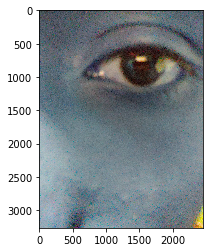

In [159]:
plt.imshow(ime)

In [137]:
ime.shape

(3264, 2448, 3)

In [138]:
ime = cv2.resize(ime, (img_size, img_size))

In [139]:
ime.shape

(128, 128, 3)

In [140]:
np.prod(ime.shape) #128*128*3

49152

In [141]:
ime = np.reshape(ime, [1,3,128,128])

In [142]:
z = model.predict(ime)
z

array([[1., 0.]], dtype=float32)

In [128]:
#checking a caaract new eye image

In [148]:
im2 = os.listdir(os.getcwd()+'/new')[0]
im2

'cataracy_eye1.jpg'

In [160]:
iim2 = cv2.imread('new/'+im2,3)

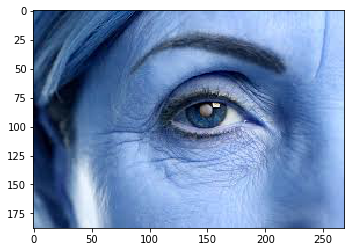

In [161]:
plt.imshow(iim2)

In [150]:
iim2 = cv2.resize(iim2, (img_size, img_size))

In [151]:
iim2 = np.reshape(iim2, [1,3,128,128])

In [153]:
z2 = model.predict(iim2)
z2

array([[0., 1.]], dtype=float32)